In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

In [22]:
# Load all CSV files
datasets = {
    'Birth Place': 'birth_place_anchor_result.csv',
    'Birth Year': 'birth_year_anchor_year_result.csv',
    'Country Capital': 'country_capital_anchor_result.csv',
    'Food Origin': 'food_origin_anchor_result.csv'
}

# Read all datasets
dfs = {}
for name, filename in datasets.items():
    dfs[name] = pd.read_csv(filename)
    print(f"{name}: {len(dfs[name])} rows loaded")

Birth Place: 92 rows loaded
Birth Year: 100 rows loaded
Country Capital: 99 rows loaded
Food Origin: 100 rows loaded


In [23]:
# Count hallucination types for each dataset
hallucination_counts = {}
for name, df in dfs.items():
    counts = df['hallucination'].value_counts().sort_index()
    hallucination_counts[name] = counts
    print(f"\n{name}:")
    print(counts)


Birth Place:
hallucination
direct    92
Name: count, dtype: int64

Birth Year:
hallucination
direct      97
indirect     3
Name: count, dtype: int64

Country Capital:
hallucination
direct      16
indirect    83
Name: count, dtype: int64

Food Origin:
hallucination
direct    97
error      3
Name: count, dtype: int64


Saved: hallucination_rate\birth_place_hallucination_types.pdf


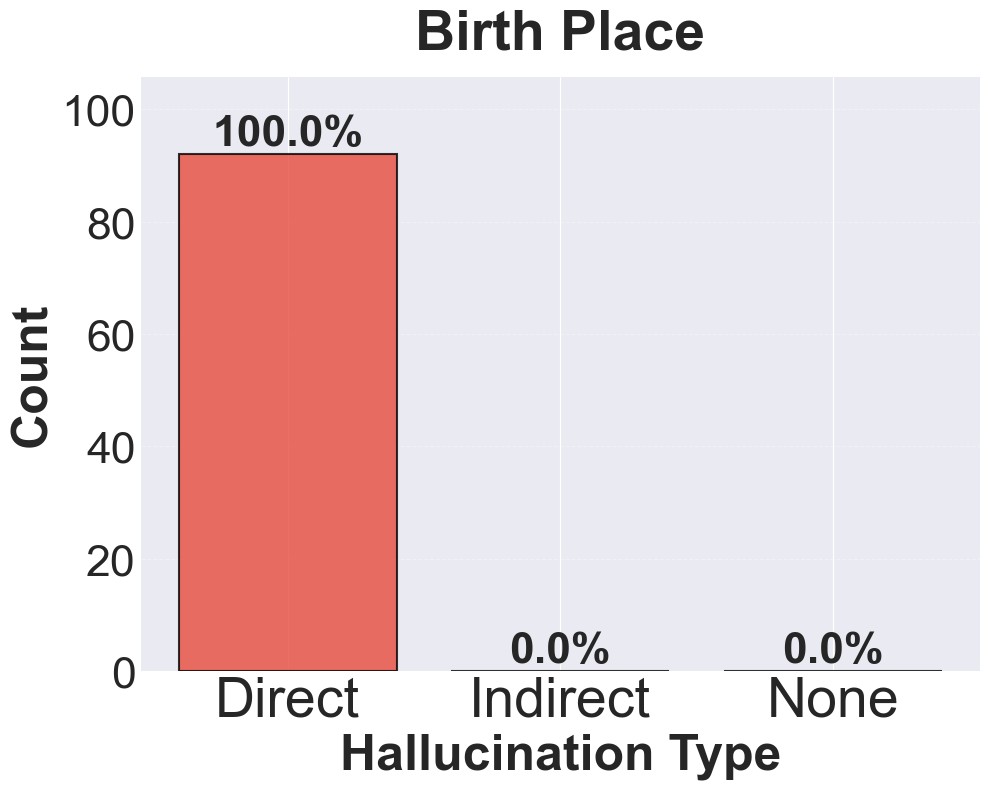

Saved: hallucination_rate\birth_year_hallucination_types.pdf


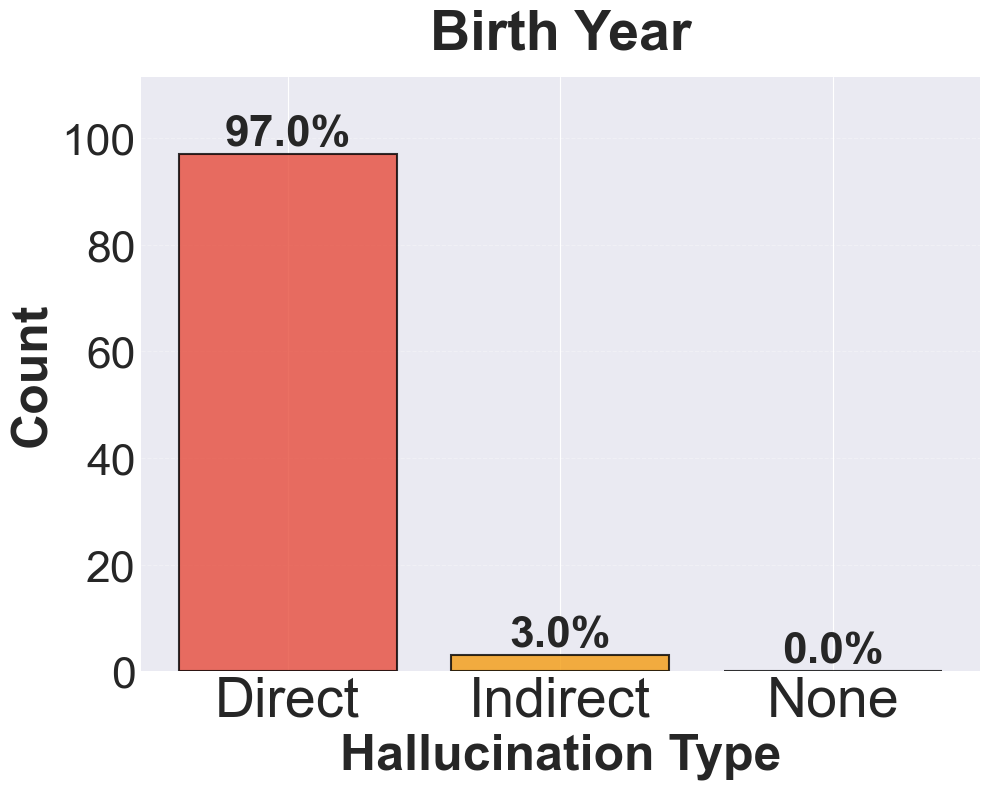

Saved: hallucination_rate\country_capital_hallucination_types.pdf


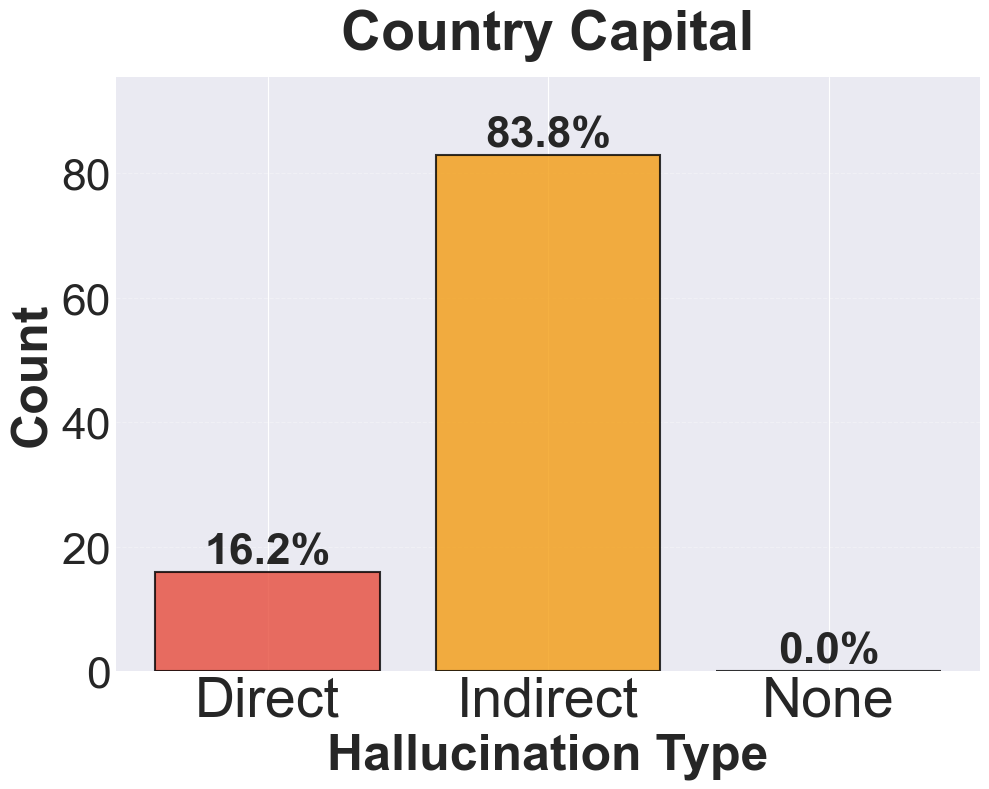

Saved: hallucination_rate\food_origin_hallucination_types.pdf


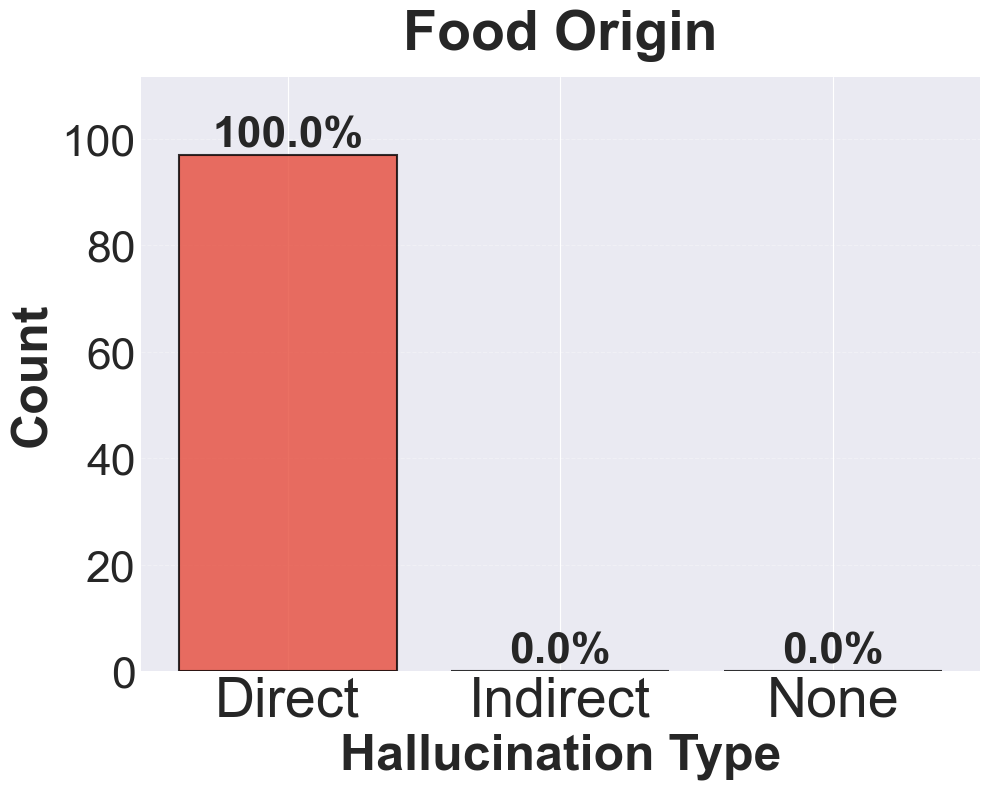


=== Summary Statistics ===

Birth Place:
  Direct: 92 (100.0%)
  Indirect: 0 (0.0%)
  None: 0 (0.0%)

Birth Year:
  Direct: 97 (97.0%)
  Indirect: 3 (3.0%)
  None: 0 (0.0%)

Country Capital:
  Direct: 16 (16.2%)
  Indirect: 83 (83.8%)
  None: 0 (0.0%)

Food Origin:
  Direct: 97 (97.0%)
  Indirect: 0 (0.0%)
  None: 0 (0.0%)


In [28]:
# Create separate plots for each dataset
import os

# Create output directory
output_dir = 'hallucination_rate'
os.makedirs(output_dir, exist_ok=True)

colors = {
    'direct': '#e74c3c',      # red
    'indirect': '#f39c12',    # orange
    'none': '#27ae60'         # green
}

for name, df in dfs.items():
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Count hallucination types
    counts = df['hallucination'].value_counts()
    
    # Get all possible hallucination types and sort them
    all_types = ['direct', 'indirect', 'none']
    hallucination_data = [counts.get(ht, 0) for ht in all_types]
    
    # Create bars
    bar_colors = [colors[ht] for ht in all_types]
    bars = ax.bar(range(len(all_types)), hallucination_data, color=bar_colors, 
                  edgecolor='black', linewidth=1.5, alpha=0.8)
    
    # Customize plot with enlarged labels (2x font sizes)
    ax.set_xlabel('Hallucination Type', fontsize=36, fontweight='bold')
    ax.set_ylabel('Count', fontsize=36, fontweight='bold')
    ax.set_title(f'{name}', fontsize=40, fontweight='bold', pad=20)
    ax.set_xticks(range(len(all_types)))
    ax.set_xticklabels([ht.capitalize() for ht in all_types], fontsize=40)
    ax.tick_params(axis='y', labelsize=32)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Add percentage labels on top of bars (including 0%)
    total = sum(hallucination_data)
    for i, (bar, value) in enumerate(zip(bars, hallucination_data)):
        percentage = (value / total) * 100 if total > 0 else 0
        if value > 0:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{percentage:.1f}%',
                   ha='center', va='bottom', fontsize=32, fontweight='bold')
        else:
            # Show 0% at the bottom for bars with no data
            ax.text(bar.get_x() + bar.get_width()/2., 0,
                   f'{percentage:.1f}%',
                   ha='center', va='bottom', fontsize=32, fontweight='bold')
    
    # Set y-axis limits with some padding
    max_val = max(hallucination_data) if max(hallucination_data) > 0 else 1
    ax.set_ylim(0, max_val * 1.15)
    
    plt.tight_layout()
    
    # Save as PDF with clean filename in the hallucination_rate folder
    filename = name.lower().replace(' ', '_')
    filepath = os.path.join(output_dir, f'{filename}_hallucination_types.pdf')
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    print(f"Saved: {filepath}")
    
    plt.show()
    plt.close()

print("\n=== Summary Statistics ===")
for name, df in dfs.items():
    counts = df['hallucination'].value_counts()
    total = len(df)
    print(f"\n{name}:")
    for hall_type in ['direct', 'indirect', 'none']:
        count = counts.get(hall_type, 0)
        pct = (count / total) * 100
        print(f"  {hall_type.capitalize()}: {count} ({pct:.1f}%)")

In [4]:
# Load event location data
event_df = pd.read_csv('event_location_fixed_positions_llm.csv')

# Check the data
print(f"Total rows: {len(event_df)}")
print(f"\nUnique anchor positions: {sorted(event_df['anchor_position'].unique())}")
print(f"\nClassification types: {event_df['classification'].unique()}")
print(f"\nSample data:")
print(event_df[['anchor_position', 'classification']].head(10))

Total rows: 900

Unique anchor positions: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(7), np.int64(10), np.int64(15), np.int64(30), np.int64(60)]

Classification types: ['CORE_HALLUCINATION' 'NO_HALLUCINATION' 'CORE_AND_PARTIAL_HALLUCINATION'
 'PARTIAL_HALLUCINATION' 'PARSE_ERROR']

Sample data:
   anchor_position      classification
0                0  CORE_HALLUCINATION
1                1  CORE_HALLUCINATION
2                2  CORE_HALLUCINATION
3                3  CORE_HALLUCINATION
4                7  CORE_HALLUCINATION
5               10  CORE_HALLUCINATION
6               15  CORE_HALLUCINATION
7               30  CORE_HALLUCINATION
8               60    NO_HALLUCINATION
9                0  CORE_HALLUCINATION


Classification percentages by anchor position:
classification   CORE_AND_PARTIAL_HALLUCINATION  CORE_HALLUCINATION  \
anchor_position                                                       
0                                           0.0                99.0   
1                                           0.0                98.0   
2                                           1.0                92.0   
3                                           1.0                83.0   
7                                          14.0                69.0   
10                                          8.0                73.0   
15                                          9.0                73.0   
30                                         25.0                24.0   
60                                         14.0                17.0   

classification   NO_HALLUCINATION  PARSE_ERROR  PARTIAL_HALLUCINATION  
anchor_position                                                        
0                          

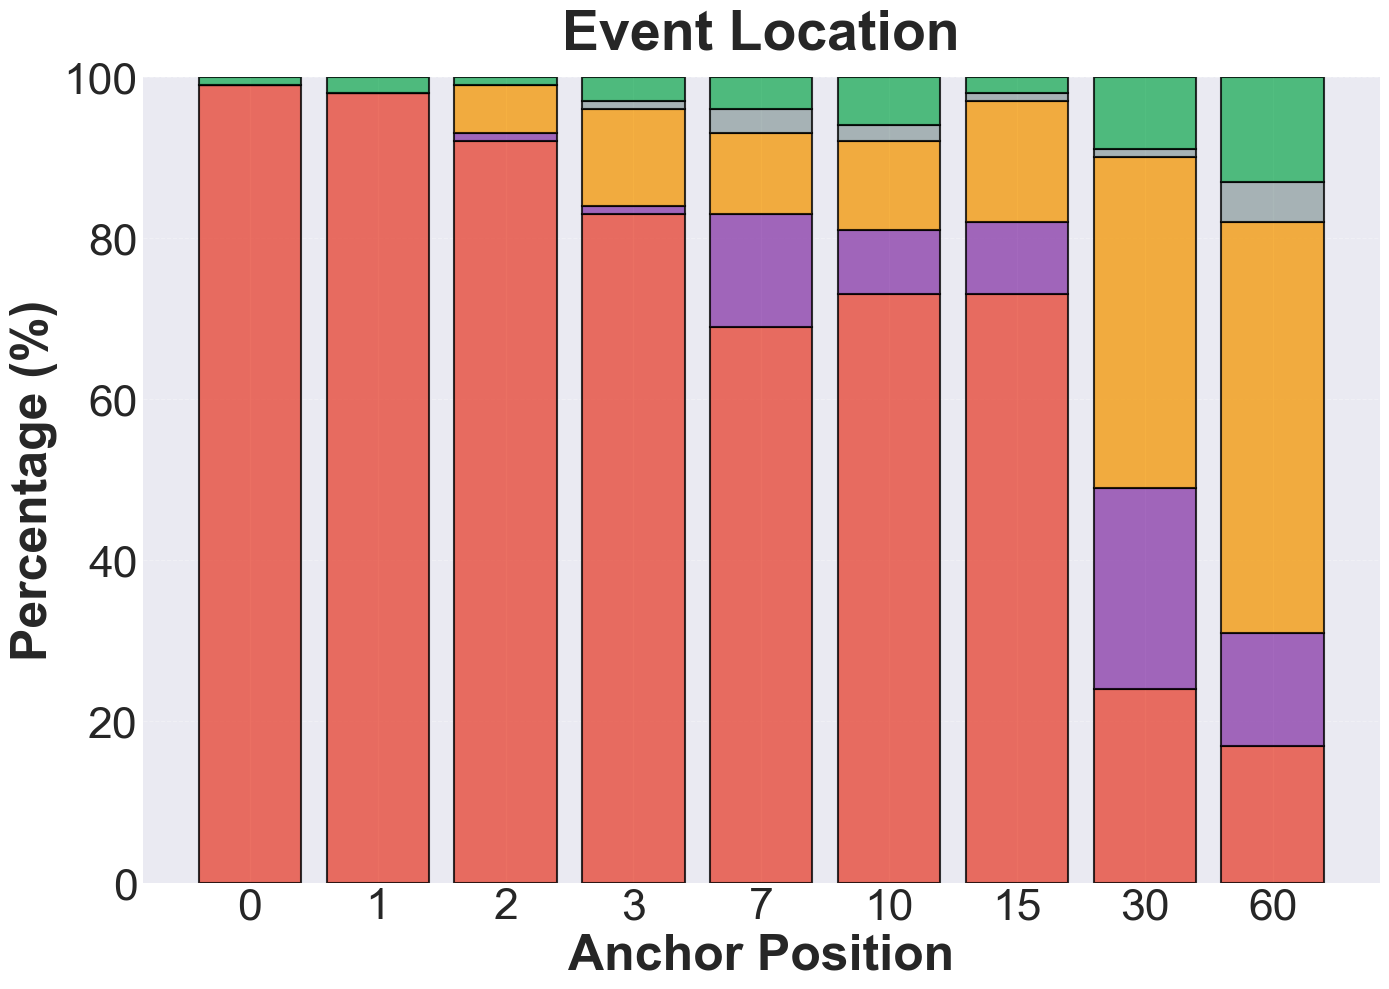

Saved legend: anchor_position\event_location_legend.pdf


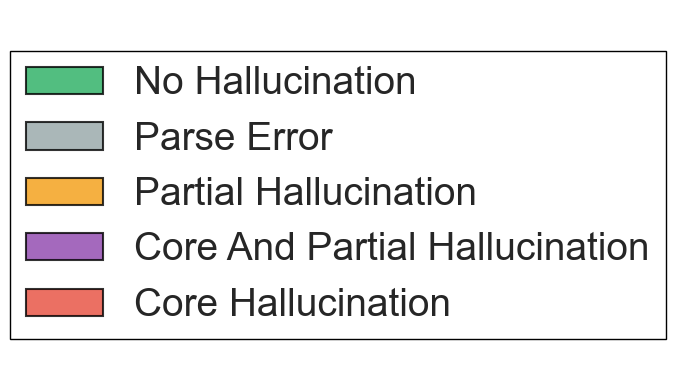

In [19]:
# Create stacked bar plot: anchor_position vs classification percentage
import os

# Calculate percentage of each classification for each anchor position
classification_by_position = event_df.groupby(['anchor_position', 'classification']).size().unstack(fill_value=0)

# Calculate percentages
classification_pct = classification_by_position.div(classification_by_position.sum(axis=1), axis=0) * 100

print("Classification percentages by anchor position:")
print(classification_pct)

# Create the stacked bar plot
fig, ax = plt.subplots(figsize=(14, 10))

# Define colors for each classification type
classification_colors = {
    'CORE_HALLUCINATION': '#e74c3c',              # red
    'CORE_AND_PARTIAL_HALLUCINATION': '#8e44ad',  # purple (distinct from orange/red)
    'PARTIAL_HALLUCINATION': '#f39c12',           # orange
    'NO_HALLUCINATION': '#27ae60',                # green
    'PARSE_ERROR': '#95a5a6'                       # gray
}

# Define the order for stacking (bottom to top in the plot = top to bottom visually)
# To get NO_HALLUCINATION at top, we need to stack CORE_HALLUCINATION first (bottom)
classification_order = ['CORE_HALLUCINATION', 'CORE_AND_PARTIAL_HALLUCINATION', 
                        'PARTIAL_HALLUCINATION', 'PARSE_ERROR', 'NO_HALLUCINATION']

# Create stacked bars in the specified order
bottom = np.zeros(len(classification_pct))
bars_dict = {}

for classification in classification_order:
    if classification in classification_pct.columns:
        values = classification_pct[classification].values
        color = classification_colors.get(classification, '#3498db')  # default blue
        bars = ax.bar(range(len(classification_pct)), values, bottom=bottom, 
                      label=classification.replace('_', ' ').title(),
                      color=color, edgecolor='black', linewidth=1.5, alpha=0.8)
        bars_dict[classification] = bars
        bottom += values

# Customize plot with large labels (NO LEGEND)
ax.set_xlabel('Anchor Position', fontsize=36, fontweight='bold')
ax.set_ylabel('Percentage (%)', fontsize=36, fontweight='bold')
ax.set_title('Event Location', fontsize=40, fontweight='bold', pad=20)
ax.set_xticks(range(len(classification_pct)))
ax.set_xticklabels(classification_pct.index, fontsize=32)
ax.tick_params(axis='y', labelsize=32)
ax.set_ylim(0, 100)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()

# Save the plot to anchor_position folder with CSV filename
output_dir = 'anchor_position'
os.makedirs(output_dir, exist_ok=True)
filepath = os.path.join(output_dir, 'event_location_fixed_positions_llm.pdf')
plt.savefig(filepath, dpi=300, bbox_inches='tight')
print(f"\nSaved plot: {filepath}")

plt.show()
plt.close()

# Create separate legend figure
fig_legend, ax_legend = plt.subplots(figsize=(6, 4))
ax_legend.axis('off')

# Get handles and labels for legend (reversed to match visual order)
handles = [plt.Rectangle((0,0),1,1, facecolor=classification_colors[c], 
                         edgecolor='black', linewidth=1.5, alpha=0.8) 
           for c in classification_order]
labels = [c.replace('_', ' ').title() for c in classification_order]

# Create legend in reversed order
legend = ax_legend.legend(handles[::-1], labels[::-1], fontsize=28, 
                          loc='center', frameon=True, fancybox=False, 
                          edgecolor='black')
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(1.0)

plt.tight_layout()

# Save legend as separate PDF
legend_filepath = os.path.join(output_dir, 'event_location_legend.pdf')
plt.savefig(legend_filepath, dpi=300, bbox_inches='tight')
print(f"Saved legend: {legend_filepath}")

plt.show()
plt.close()


In [16]:
# Print out the percentage values for the event location plot
print("\n=== Event Location - Classification Percentages by Anchor Position ===\n")
print(classification_pct.round(1))

# Also print in a more readable format
print("\n=== Detailed Breakdown ===")
for anchor_pos in classification_pct.index:
    print(f"\nAnchor Position {anchor_pos}:")
    for class_type in classification_pct.columns:
        pct = classification_pct.loc[anchor_pos, class_type]
        if pct > 0:
            print(f"  {class_type.replace('_', ' ').title()}: {pct:.1f}%")

# Save the percentage data to CSV
output_dir = 'anchor_position'
os.makedirs(output_dir, exist_ok=True)
csv_filepath = os.path.join(output_dir, 'event_location_classification_percentages.csv')
classification_pct.to_csv(csv_filepath)
print(f"\n✓ Saved classification percentages to: {csv_filepath}")


=== Event Location - Classification Percentages by Anchor Position ===

classification   CORE_AND_PARTIAL_HALLUCINATION  CORE_HALLUCINATION  \
anchor_position                                                       
0                                           0.0                99.0   
1                                           0.0                98.0   
2                                           1.0                92.0   
3                                           1.0                83.0   
7                                          14.0                69.0   
10                                          8.0                73.0   
15                                          9.0                73.0   
30                                         25.0                24.0   
60                                         14.0                17.0   

classification   NO_HALLUCINATION  PARSE_ERROR  PARTIAL_HALLUCINATION  
anchor_position                                                        
0

In [20]:
# Load the three new datasets
new_datasets = {
    'Birth Place': 'birth_place_full_result.csv',
    'Country Capital': 'country_capitol_full.csv',
    'Food Origin': 'food_origin_full.csv'
}

new_dfs = {}
for name, filename in new_datasets.items():
    new_dfs[name] = pd.read_csv(filename)
    print(f"{name}: {len(new_dfs[name])} rows loaded")
    print(f"  Unique anchor positions: {sorted(new_dfs[name]['anchor_position'].unique())}")
    print(f"  Classification types: {new_dfs[name]['classification'].unique()}")
    print()

Birth Place: 900 rows loaded
  Unique anchor positions: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(7), np.int64(10), np.int64(15), np.int64(30), np.int64(60)]
  Classification types: ['CORE_HALLUCINATION' 'PARTIAL_HALLUCINATION' 'NO_HALLUCINATION'
 'PARSE_ERROR' 'CORE_AND_PARTIAL_HALLUCINATION']

Country Capital: 900 rows loaded
  Unique anchor positions: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(7), np.int64(10), np.int64(15), np.int64(30), np.int64(60)]
  Classification types: ['CORE_HALLUCINATION' 'NO_HALLUCINATION' 'PARTIAL_HALLUCINATION'
 'CORE_AND_PARTIAL_HALLUCINATION' 'PARSE_ERROR']

Food Origin: 900 rows loaded
  Unique anchor positions: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(7), np.int64(10), np.int64(15), np.int64(30), np.int64(60)]
  Classification types: ['CORE_HALLUCINATION' 'PARTIAL_HALLUCINATION'
 'CORE_AND_PARTIAL_HALLUCINATION' 'NO_HALLUCINATION' 'PARSE_ERROR']




Birth Place - Classification percentages by anchor position:
classification   CORE_AND_PARTIAL_HALLUCINATION  CORE_HALLUCINATION  \
anchor_position                                                       
0                                           0.0               100.0   
1                                           0.0               100.0   
2                                           2.0                92.0   
3                                           1.0                98.0   
7                                           0.0               100.0   
10                                          3.0                88.0   
15                                         14.0                43.0   
30                                         25.0                28.0   
60                                         10.0                39.0   

classification   NO_HALLUCINATION  PARSE_ERROR  PARTIAL_HALLUCINATION  
anchor_position                                                        
0           

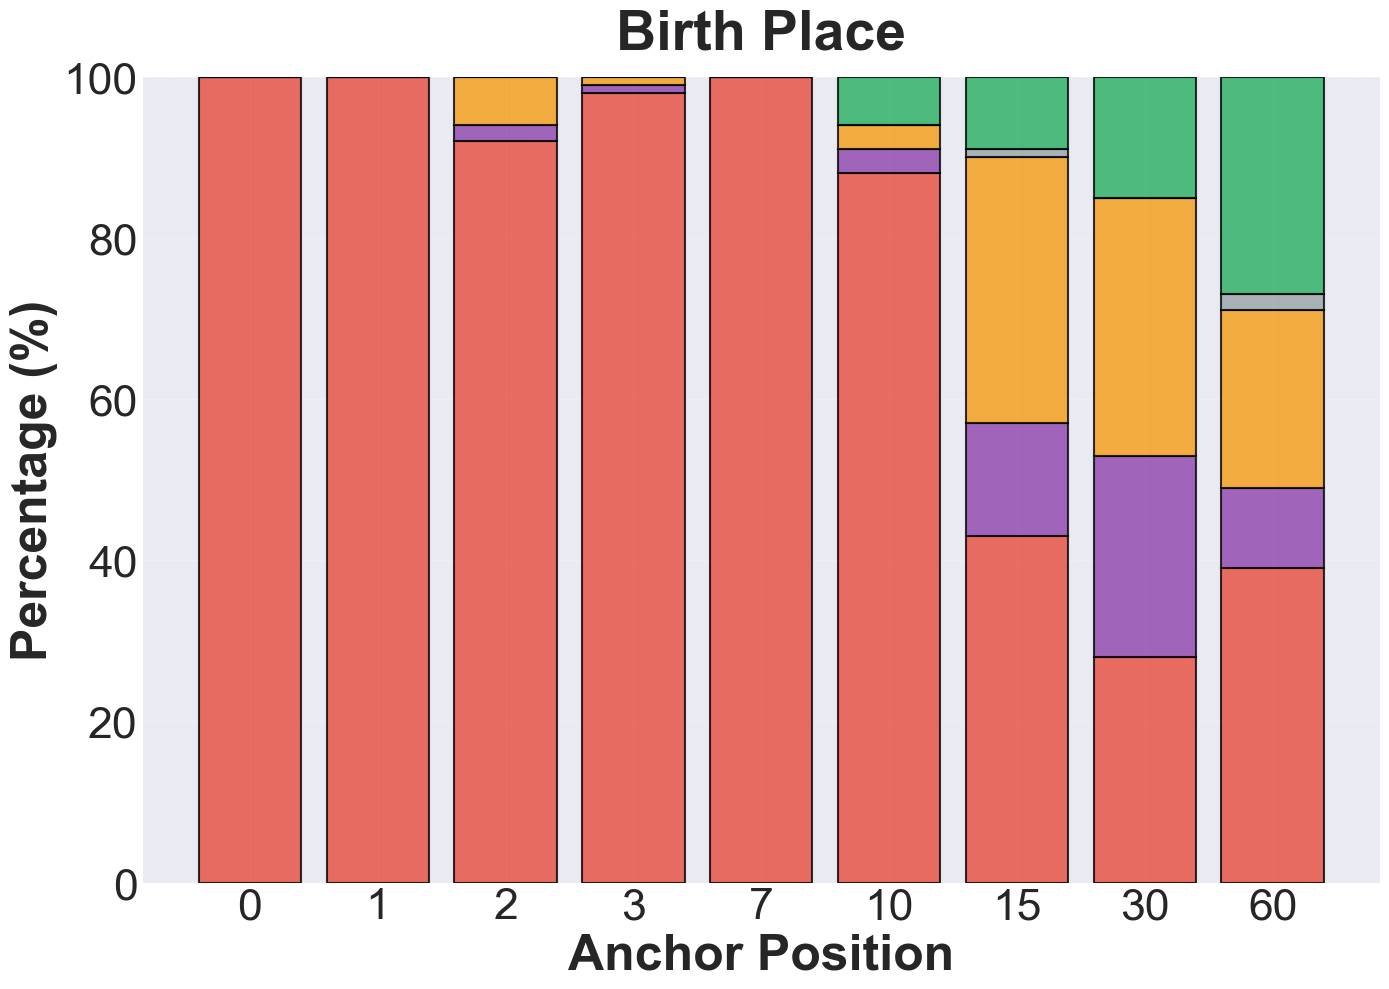

Saved legend: anchor_position\birth_place_legend.pdf


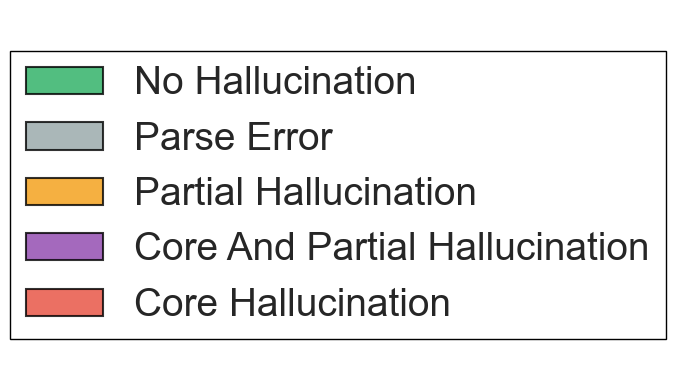




Country Capital - Classification percentages by anchor position:
classification   CORE_AND_PARTIAL_HALLUCINATION  CORE_HALLUCINATION  \
anchor_position                                                       
0                                           0.0                99.0   
1                                           0.0                99.0   
2                                           0.0                98.0   
3                                           0.0                99.0   
7                                           0.0                51.0   
10                                          8.0                18.0   
15                                          2.0                 8.0   
30                                          1.0                 3.0   
60                                          3.0                 0.0   

classification   NO_HALLUCINATION  PARSE_ERROR  PARTIAL_HALLUCINATION  
anchor_position                                                        
0     

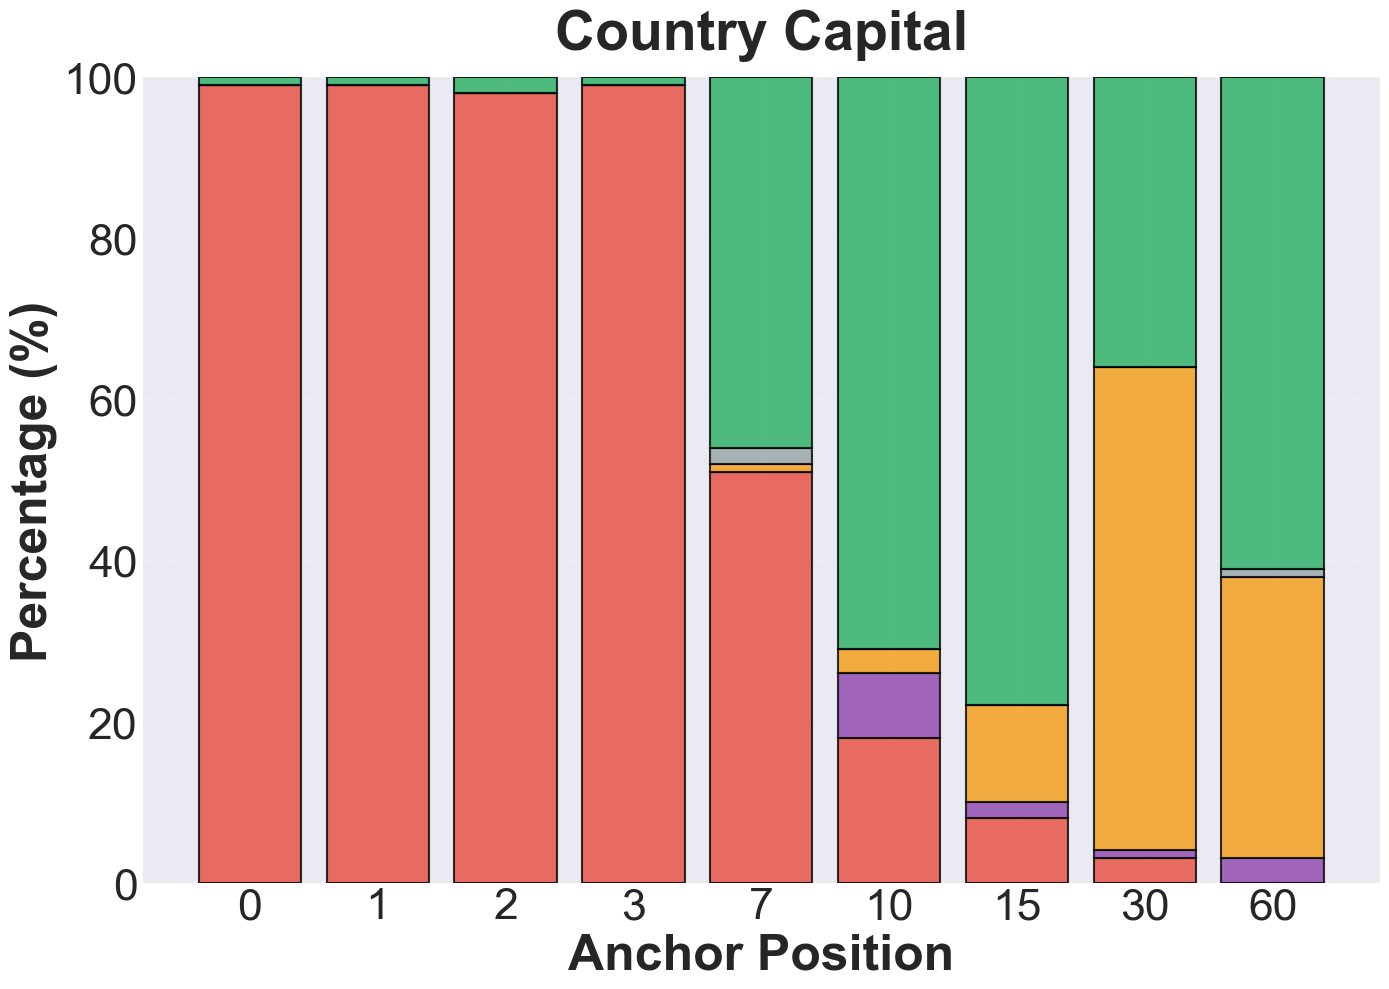

Saved legend: anchor_position\country_capital_legend.pdf


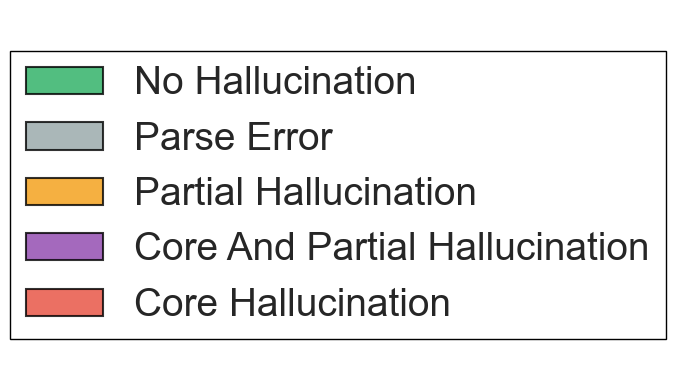




Food Origin - Classification percentages by anchor position:
classification   CORE_AND_PARTIAL_HALLUCINATION  CORE_HALLUCINATION  \
anchor_position                                                       
0                                           0.0               100.0   
1                                           3.0                84.0   
2                                           1.0                88.0   
3                                           1.0                87.0   
7                                           4.0                87.0   
10                                         23.0                62.0   
15                                         27.0                48.0   
30                                         11.0                30.0   
60                                          6.0                18.0   

classification   NO_HALLUCINATION  PARSE_ERROR  PARTIAL_HALLUCINATION  
anchor_position                                                        
0         

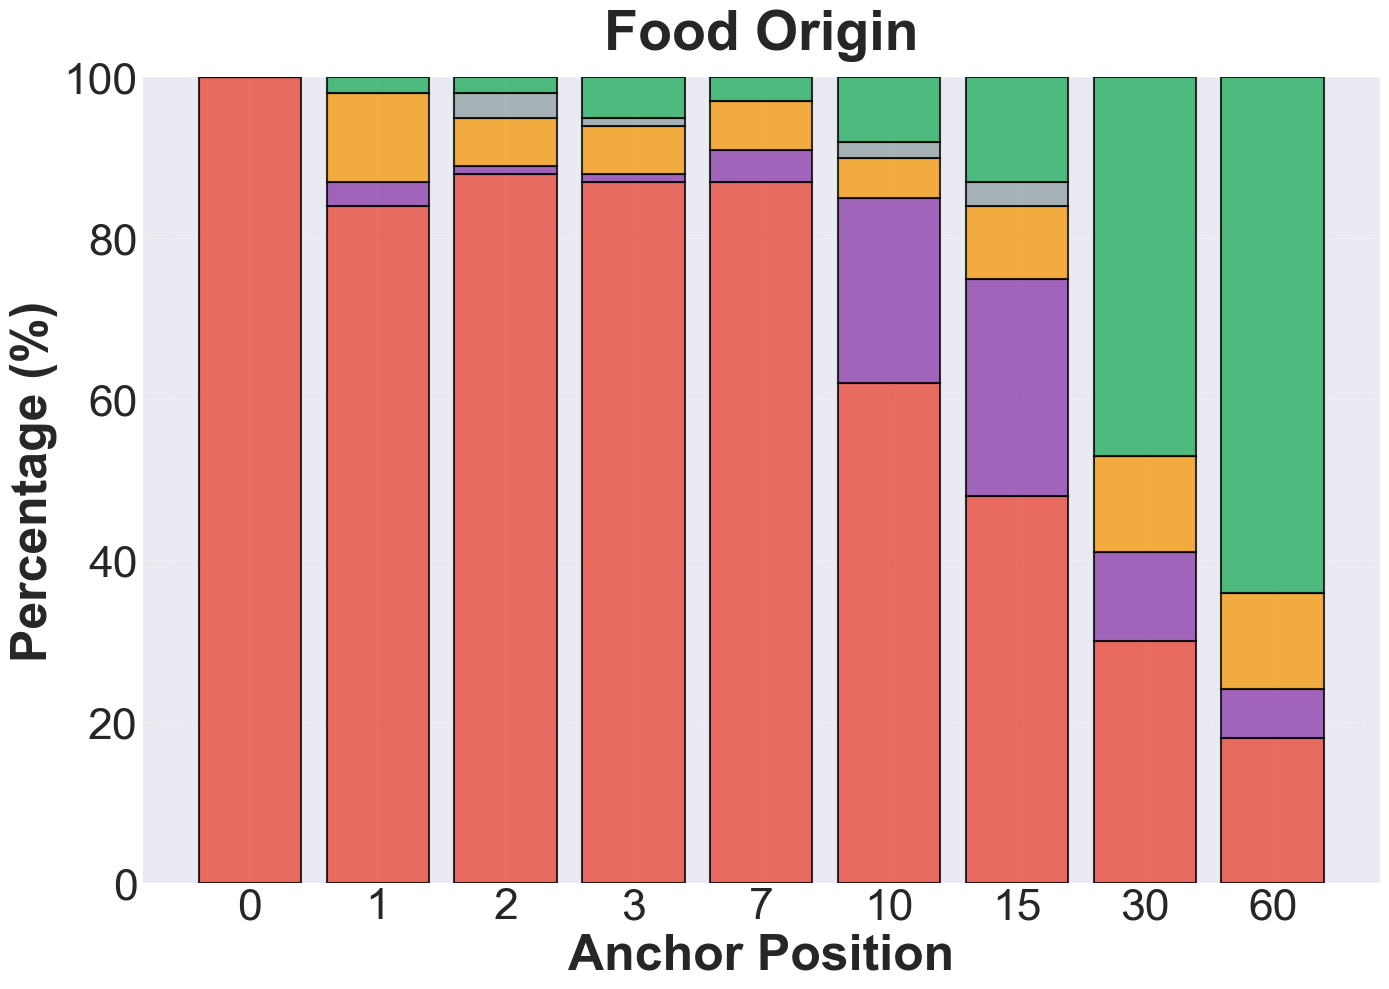

Saved legend: anchor_position\food_origin_legend.pdf


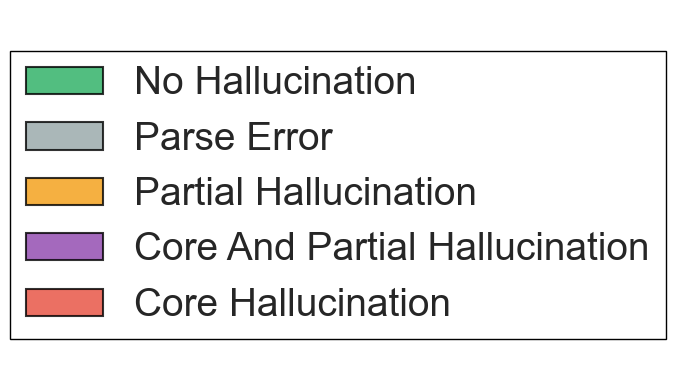

In [21]:
# Create stacked bar plots for the three new datasets
import os

# Define colors for each classification type (consistent with event location)
classification_colors = {
    'CORE_HALLUCINATION': '#e74c3c',              # red
    'CORE_AND_PARTIAL_HALLUCINATION': '#8e44ad',  # purple
    'PARTIAL_HALLUCINATION': '#f39c12',           # orange
    'NO_HALLUCINATION': '#27ae60',                # green
    'PARSE_ERROR': '#95a5a6'                       # gray
}

classification_order = ['CORE_HALLUCINATION', 'CORE_AND_PARTIAL_HALLUCINATION', 
                        'PARTIAL_HALLUCINATION', 'PARSE_ERROR', 'NO_HALLUCINATION']

output_dir = 'anchor_position'
os.makedirs(output_dir, exist_ok=True)

for name, df in new_dfs.items():
    # Calculate percentage of each classification for each anchor position
    classification_by_position = df.groupby(['anchor_position', 'classification']).size().unstack(fill_value=0)
    
    # Calculate percentages
    classification_pct = classification_by_position.div(classification_by_position.sum(axis=1), axis=0) * 100
    
    print(f"\n{name} - Classification percentages by anchor position:")
    print(classification_pct)
    
    # Create the stacked bar plot
    fig, ax = plt.subplots(figsize=(14, 10))
    
    # Create stacked bars in the specified order
    bottom = np.zeros(len(classification_pct))
    bars_dict = {}
    
    for classification in classification_order:
        if classification in classification_pct.columns:
            values = classification_pct[classification].values
            color = classification_colors.get(classification, '#3498db')
            bars = ax.bar(range(len(classification_pct)), values, bottom=bottom, 
                          label=classification.replace('_', ' ').title(),
                          color=color, edgecolor='black', linewidth=1.5, alpha=0.8)
            bars_dict[classification] = bars
            bottom += values
    
    # Customize plot with large labels (NO LEGEND)
    ax.set_xlabel('Anchor Position', fontsize=36, fontweight='bold')
    ax.set_ylabel('Percentage (%)', fontsize=36, fontweight='bold')
    ax.set_title(f'{name}', fontsize=40, fontweight='bold', pad=20)
    ax.set_xticks(range(len(classification_pct)))
    ax.set_xticklabels(classification_pct.index, fontsize=32)
    ax.tick_params(axis='y', labelsize=32)
    ax.set_ylim(0, 100)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    
    # Save the plot
    filename = name.lower().replace(' ', '_')
    filepath = os.path.join(output_dir, f'{filename}_full.pdf')
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    print(f"Saved plot: {filepath}")
    
    plt.show()
    plt.close()
    
    # Create separate legend figure
    fig_legend, ax_legend = plt.subplots(figsize=(6, 4))
    ax_legend.axis('off')
    
    # Get handles and labels for legend (reversed to match visual order)
    handles = [plt.Rectangle((0,0),1,1, facecolor=classification_colors[c], 
                             edgecolor='black', linewidth=1.5, alpha=0.8) 
               for c in classification_order]
    labels = [c.replace('_', ' ').title() for c in classification_order]
    
    # Create legend in reversed order
    legend = ax_legend.legend(handles[::-1], labels[::-1], fontsize=28, 
                              loc='center', frameon=True, fancybox=False, 
                              edgecolor='black')
    legend.get_frame().set_facecolor('white')
    legend.get_frame().set_alpha(1.0)
    
    plt.tight_layout()
    
    # Save legend as separate PDF
    legend_filepath = os.path.join(output_dir, f'{filename}_legend.pdf')
    plt.savefig(legend_filepath, dpi=300, bbox_inches='tight')
    print(f"Saved legend: {legend_filepath}")
    
    plt.show()
    plt.close()
    
    print(f"\n{'='*60}\n")

In [22]:
# Print detailed percentages and save to CSV for the three new datasets
output_dir = 'anchor_position'
os.makedirs(output_dir, exist_ok=True)

for name, df in new_dfs.items():
    # Calculate percentage of each classification for each anchor position
    classification_by_position = df.groupby(['anchor_position', 'classification']).size().unstack(fill_value=0)
    classification_pct = classification_by_position.div(classification_by_position.sum(axis=1), axis=0) * 100
    
    print(f"\n=== {name} - Classification Percentages by Anchor Position ===\n")
    print(classification_pct.round(1))
    
    # Print in a more readable format
    print(f"\n=== {name} - Detailed Breakdown ===")
    for anchor_pos in classification_pct.index:
        print(f"\nAnchor Position {anchor_pos}:")
        for class_type in classification_pct.columns:
            pct = classification_pct.loc[anchor_pos, class_type]
            if pct > 0:
                print(f"  {class_type.replace('_', ' ').title()}: {pct:.1f}%")
    
    # Save the percentage data to CSV
    filename = name.lower().replace(' ', '_')
    csv_filepath = os.path.join(output_dir, f'{filename}_classification_percentages.csv')
    classification_pct.to_csv(csv_filepath)
    print(f"\n✓ Saved classification percentages to: {csv_filepath}")
    print(f"\n{'='*60}\n")


=== Birth Place - Classification Percentages by Anchor Position ===

classification   CORE_AND_PARTIAL_HALLUCINATION  CORE_HALLUCINATION  \
anchor_position                                                       
0                                           0.0               100.0   
1                                           0.0               100.0   
2                                           2.0                92.0   
3                                           1.0                98.0   
7                                           0.0               100.0   
10                                          3.0                88.0   
15                                         14.0                43.0   
30                                         25.0                28.0   
60                                         10.0                39.0   

classification   NO_HALLUCINATION  PARSE_ERROR  PARTIAL_HALLUCINATION  
anchor_position                                                        
0   

Birth Place: 300 rows loaded
Birth Year: 300 rows loaded
Country Capital: 300 rows loaded
Event Location: 300 rows loaded
Food Origin: 300 rows loaded

Birth Place - Classification percentages by anchor position:
classification   CORE_AND_PARTIAL_HALLUCINATION  CORE_HALLUCINATION  \
anchor_position                                                       
3                                           0.0                16.0   
5                                           0.0                12.0   
10                                          0.0                14.0   
15                                          2.0                20.0   
30                                          4.0                20.0   
60                                          4.0                24.0   

classification   NO_HALLUCINATION  PARSE_ERROR  PARTIAL_HALLUCINATION  
anchor_position                                                        
3                            80.0          4.0                    0.0  
5 

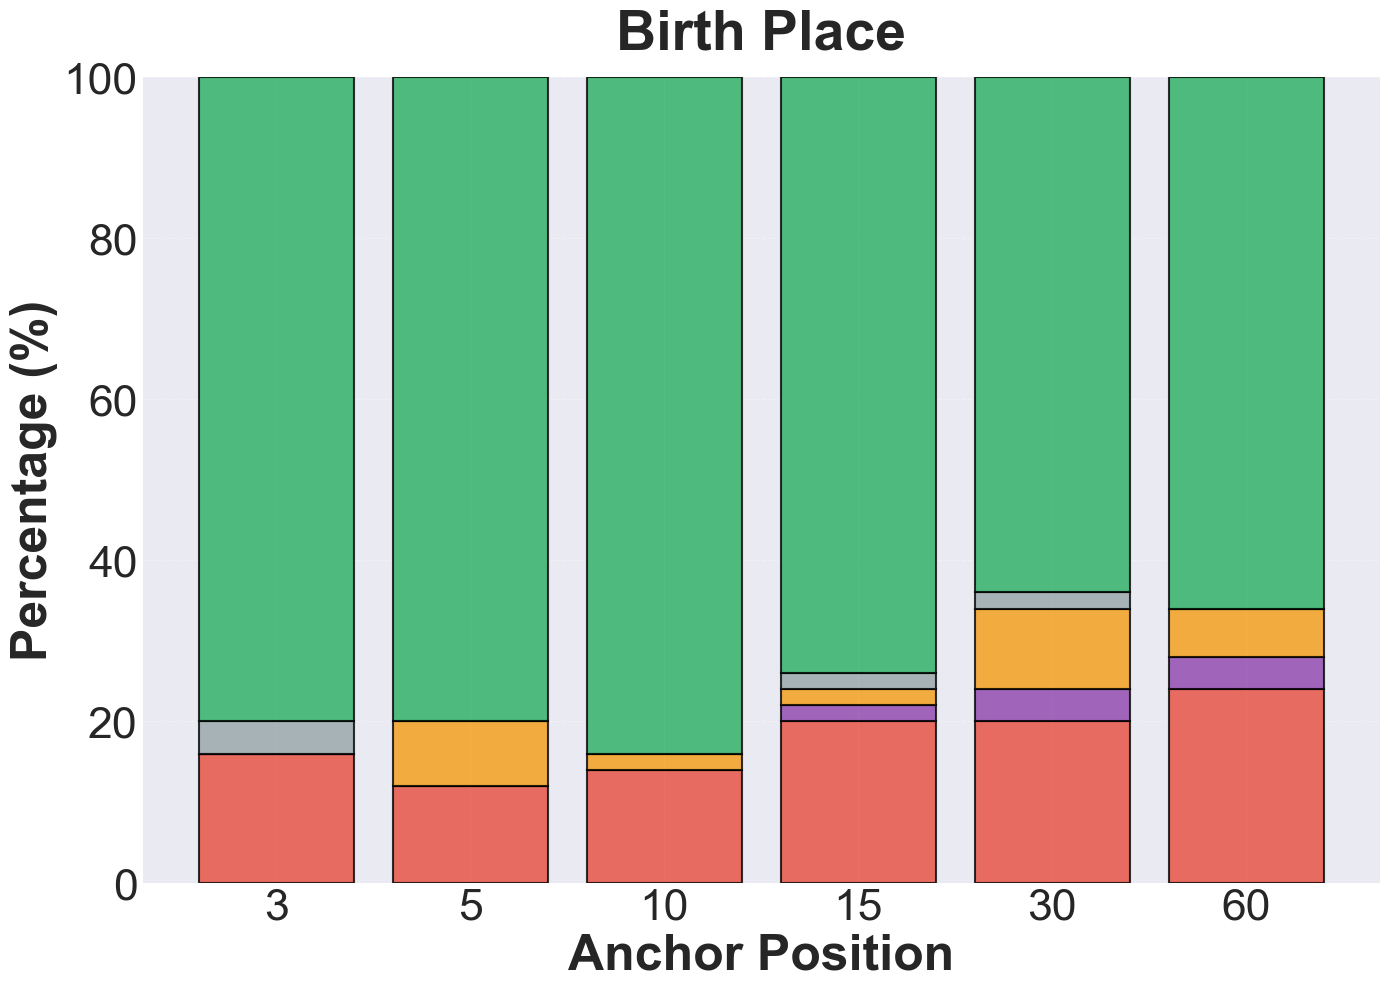

Saved legend: normal_anchor\birth_place_legend.pdf


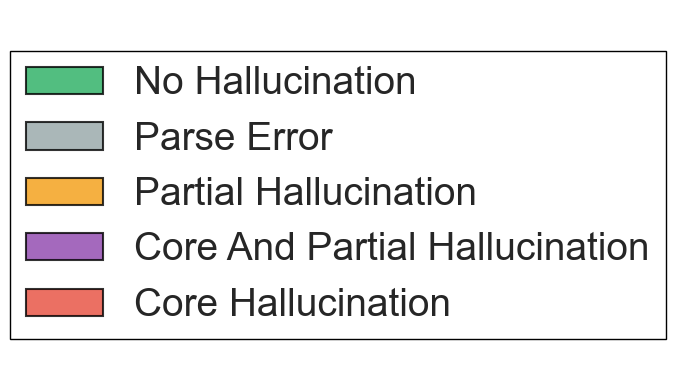

Saved CSV: normal_anchor\birth_place_classification_percentages.csv

Birth Year - Classification percentages by anchor position:
classification   CORE_AND_PARTIAL_HALLUCINATION  CORE_HALLUCINATION  \
anchor_position                                                       
3                                           0.0                14.0   
5                                           0.0                 0.0   
10                                          0.0                 8.0   
15                                          2.0                 4.0   
30                                          0.0                10.0   
60                                          4.0                 4.0   

classification   NO_HALLUCINATION  PARSE_ERROR  PARTIAL_HALLUCINATION  
anchor_position                                                        
3                            80.0          0.0                    6.0  
5                            94.0          0.0                    6.0  
10            

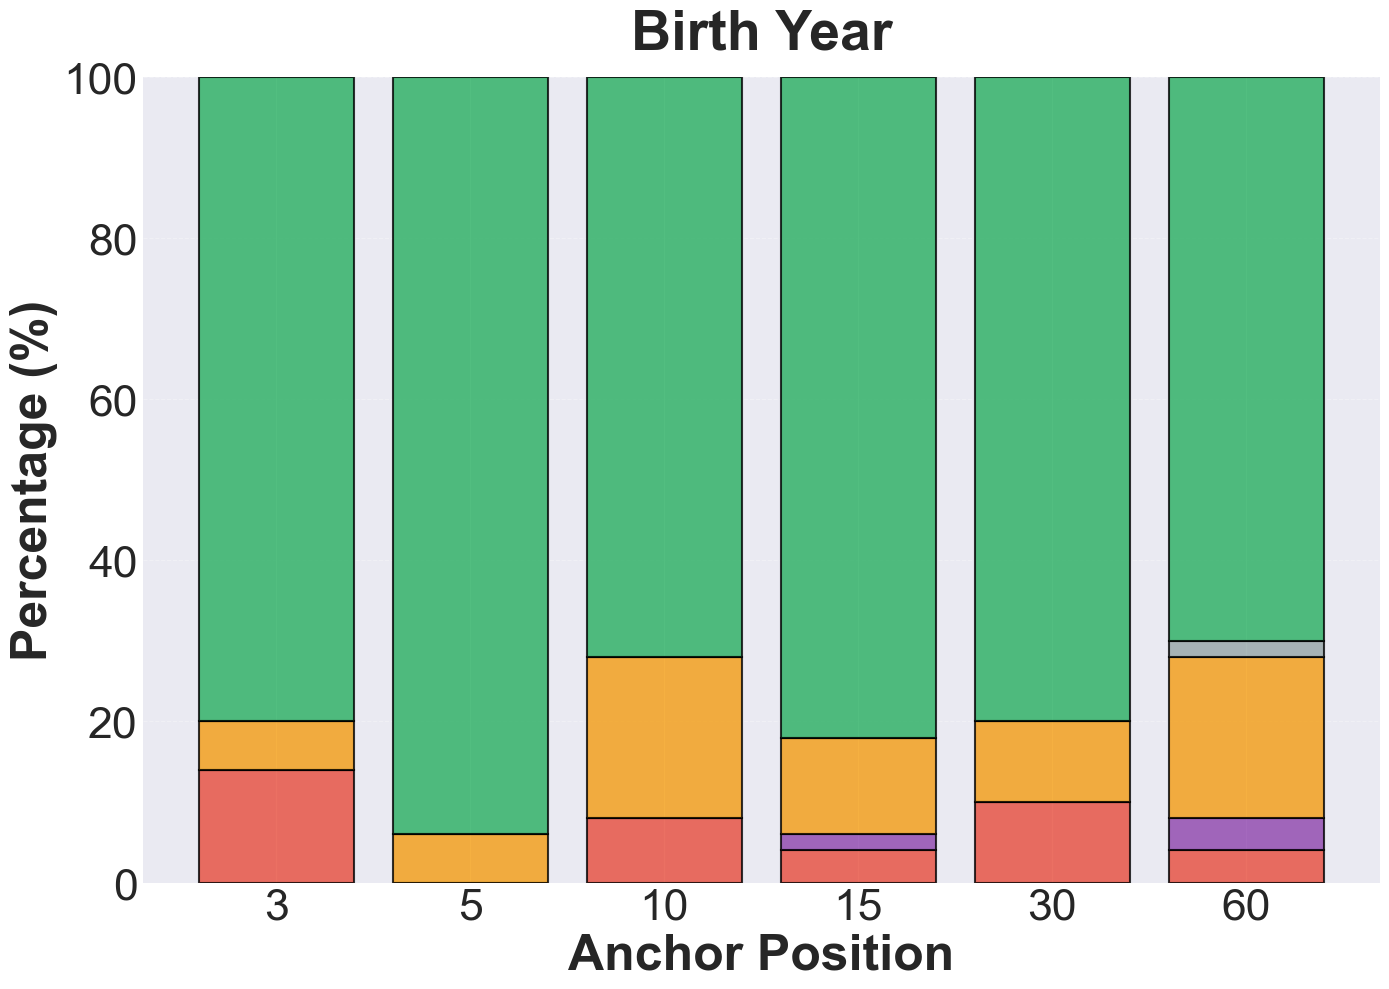

Saved legend: normal_anchor\birth_year_legend.pdf


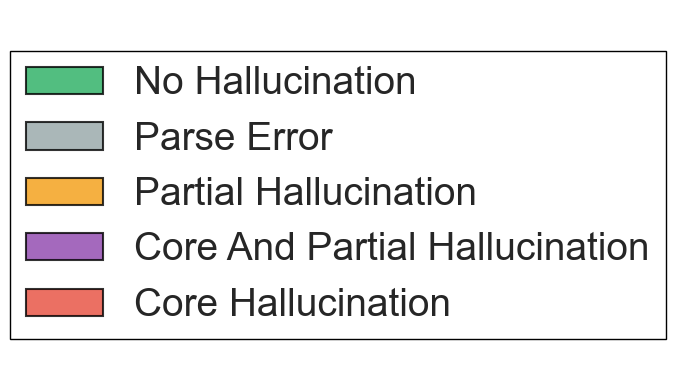

Saved CSV: normal_anchor\birth_year_classification_percentages.csv

Country Capital - Classification percentages by anchor position:
classification   CORE_AND_PARTIAL_HALLUCINATION  CORE_HALLUCINATION  \
anchor_position                                                       
3                                           0.0                14.0   
5                                           0.0                30.0   
10                                          2.0                 6.0   
15                                          0.0                 6.0   
30                                          2.0                 4.0   
60                                          0.0                 6.0   

classification   NO_HALLUCINATION  PARSE_ERROR  PARTIAL_HALLUCINATION  
anchor_position                                                        
3                            84.0          2.0                    0.0  
5                            68.0          2.0                    0.0  
10        

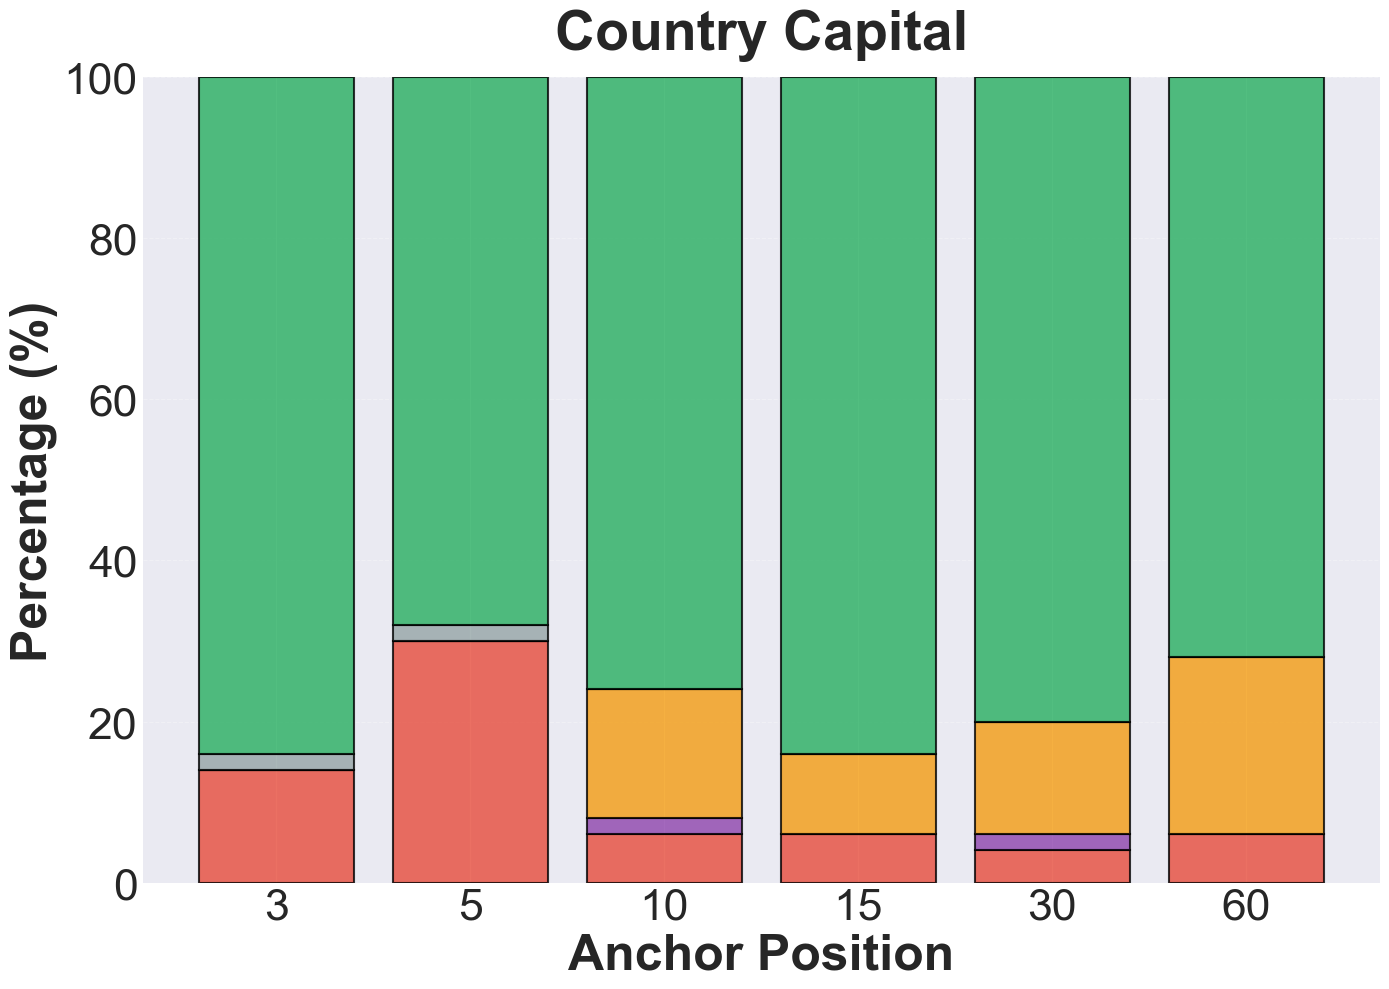

Saved legend: normal_anchor\country_capital_legend.pdf


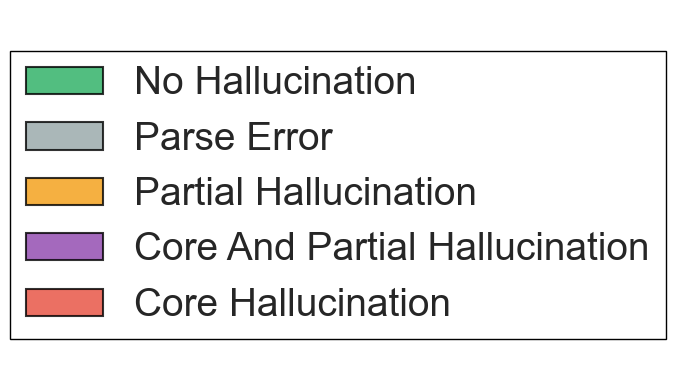

Saved CSV: normal_anchor\country_capital_classification_percentages.csv

Event Location - Classification percentages by anchor position:
classification   CORE_AND_PARTIAL_HALLUCINATION  CORE_HALLUCINATION  \
anchor_position                                                       
3                                           2.0                92.0   
5                                           0.0                66.0   
10                                          2.0                22.0   
15                                          2.0                46.0   
30                                          0.0                14.0   
60                                          6.0                18.0   

classification   NO_HALLUCINATION  PARSE_ERROR  PARTIAL_HALLUCINATION  
anchor_position                                                        
3                             4.0          2.0                    0.0  
5                            18.0          2.0                   14.0  
10    

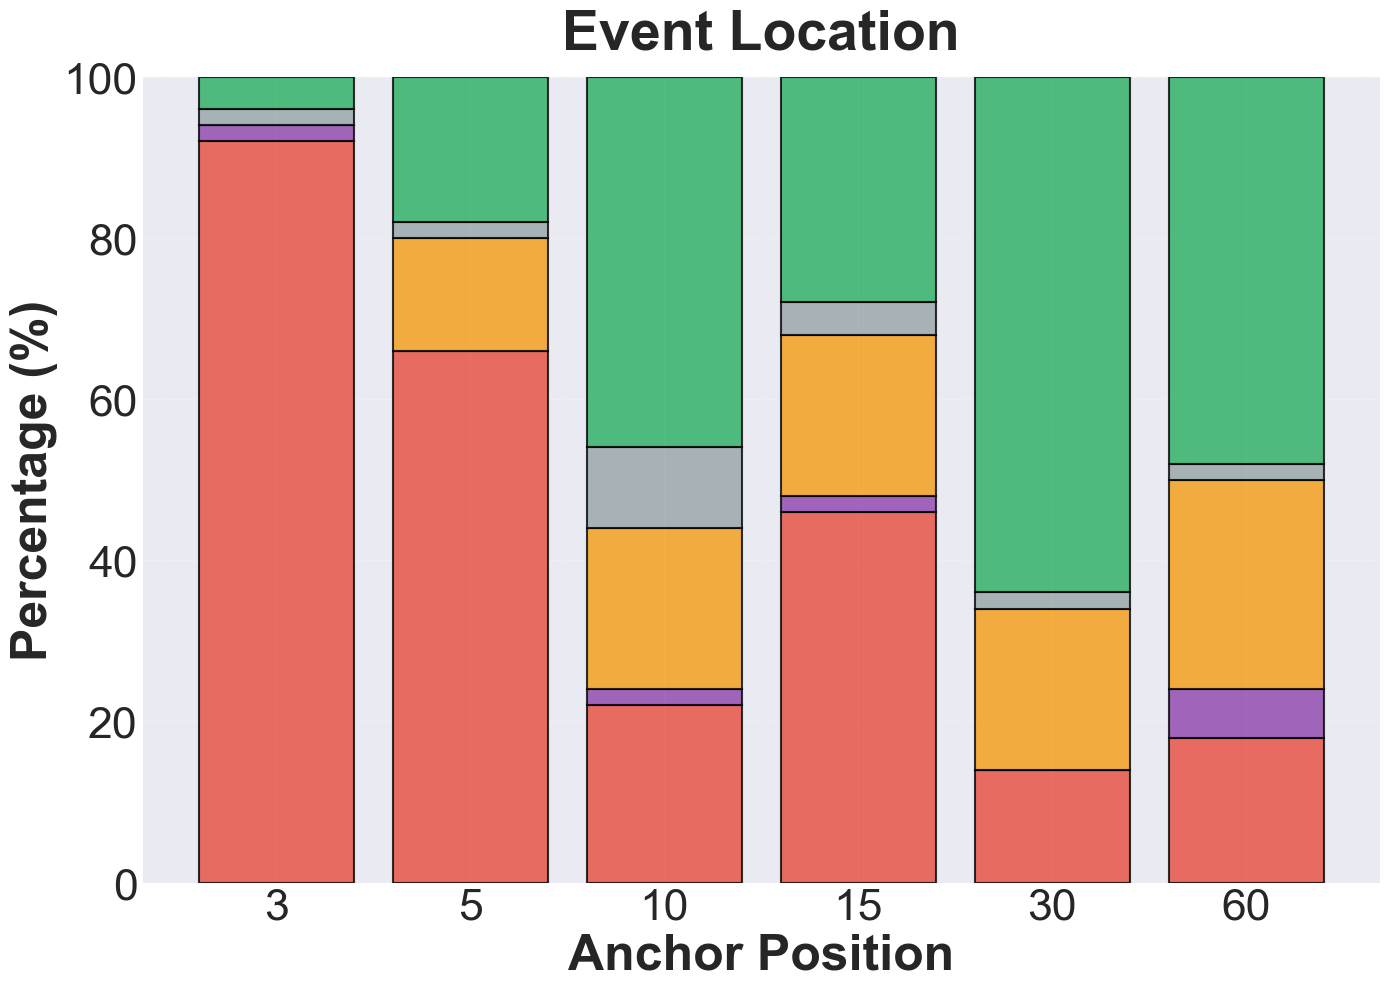

Saved legend: normal_anchor\event_location_legend.pdf


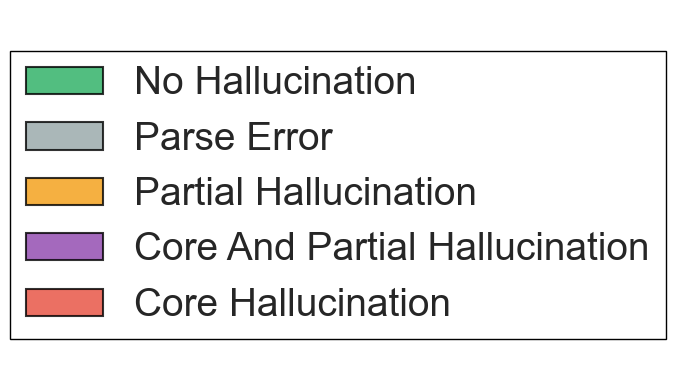

Saved CSV: normal_anchor\event_location_classification_percentages.csv

Food Origin - Classification percentages by anchor position:
classification   CORE_AND_PARTIAL_HALLUCINATION  CORE_HALLUCINATION  \
anchor_position                                                       
3                                           2.0                84.0   
5                                           2.0                70.0   
10                                          6.0                40.0   
15                                         10.0                28.0   
30                                          4.0                22.0   
60                                         12.0                24.0   

classification   NO_HALLUCINATION  PARSE_ERROR  PARTIAL_HALLUCINATION  
anchor_position                                                        
3                            14.0          0.0                    0.0  
5                            22.0          2.0                    4.0  
10        

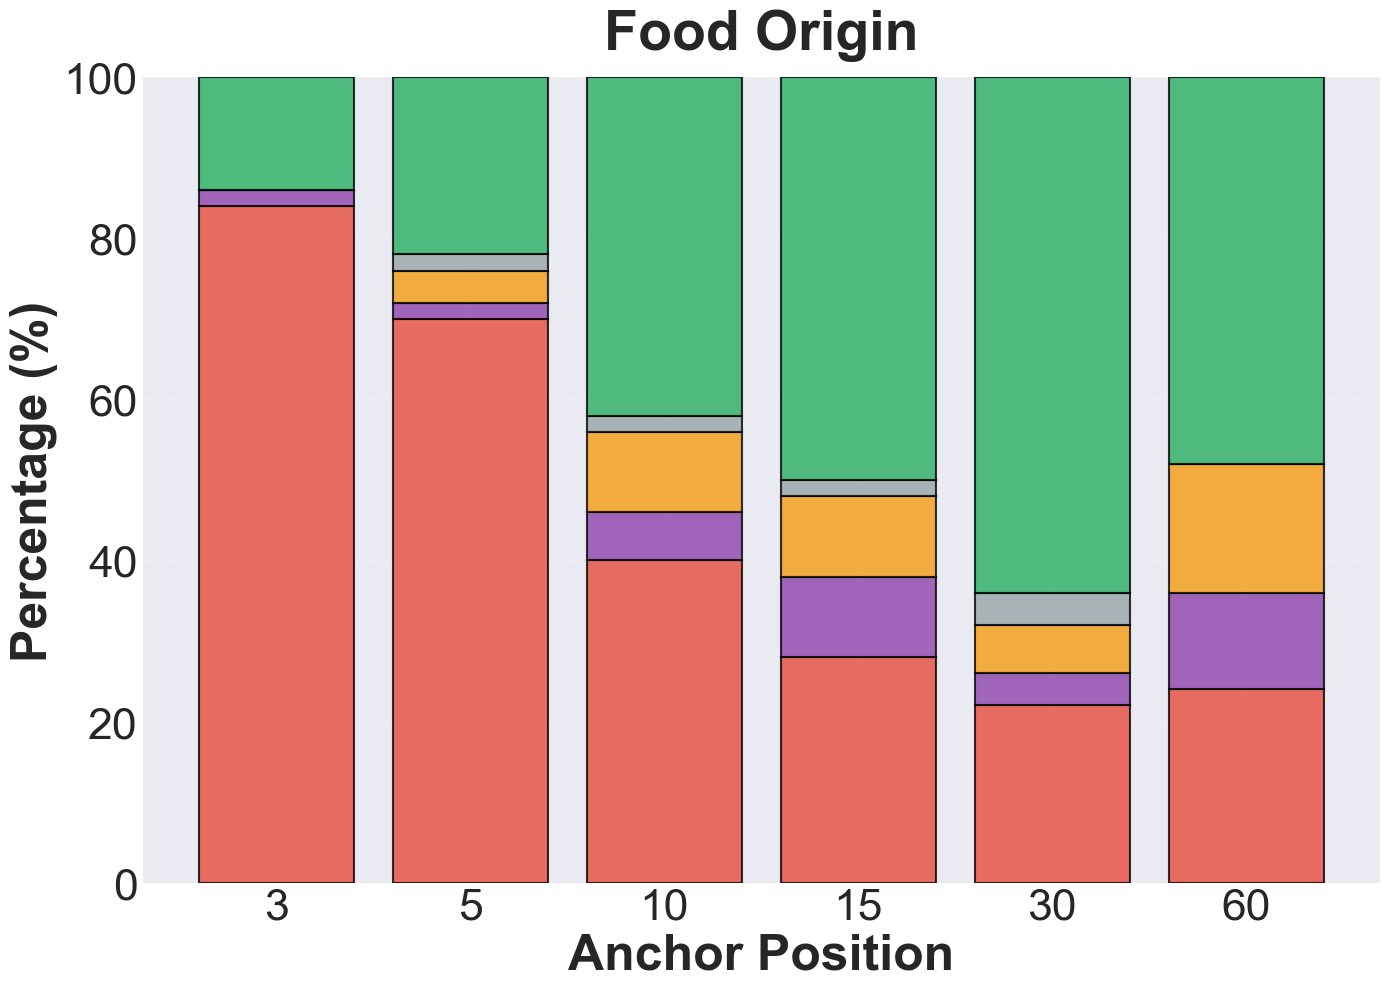

Saved legend: normal_anchor\food_origin_legend.pdf


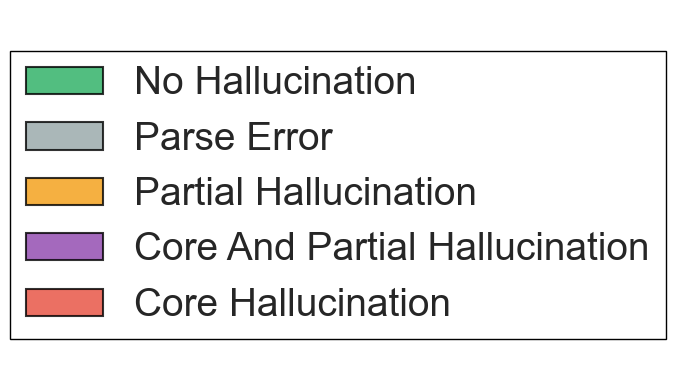

Saved CSV: normal_anchor\food_origin_classification_percentages.csv

All available `normal_anchor` plots/legends/CSVs generated (where files existed).


In [2]:
# Create stacked bar plots for the five "normal anchor" datasets and save to `normal_anchor`
import os

# Datasets to process
normal_datasets = {
    'Birth Place': 'birth_place_results.csv',
    'Birth Year': 'birth_year_results.csv',
    'Country Capital': 'country_capital_results.csv',
    'Event Location': 'event_location_results.csv',
    'Food Origin': 'food_origin_results.csv'
}

# Colors and order (kept consistent with other cells)
classification_colors = {
    'CORE_HALLUCINATION': '#e74c3c',
    'CORE_AND_PARTIAL_HALLUCINATION': '#8e44ad',
    'PARTIAL_HALLUCINATION': '#f39c12',
    'NO_HALLUCINATION': '#27ae60',
    'PARSE_ERROR': '#95a5a6'
}
classification_order = ['CORE_HALLUCINATION', 'CORE_AND_PARTIAL_HALLUCINATION',
                        'PARTIAL_HALLUCINATION', 'PARSE_ERROR', 'NO_HALLUCINATION']

output_dir = 'normal_anchor'
os.makedirs(output_dir, exist_ok=True)

# Load and process each file
normal_dfs = {}
for name, filename in normal_datasets.items():
    try:
        df = pd.read_csv(filename)
    except FileNotFoundError:
        print(f"WARNING: file not found: {filename} — skipping {name}")
        continue
    normal_dfs[name] = df
    print(f"{name}: {len(df)} rows loaded")

for name, df in normal_dfs.items():
    classification_by_position = df.groupby(['anchor_position', 'classification']).size().unstack(fill_value=0)
    classification_pct = classification_by_position.div(classification_by_position.sum(axis=1), axis=0) * 100

    print(f"\n{name} - Classification percentages by anchor position:")
    print(classification_pct.round(1))

    # Plot
    fig, ax = plt.subplots(figsize=(14, 10))
    bottom = np.zeros(len(classification_pct))

    for classification in classification_order:
        if classification in classification_pct.columns:
            values = classification_pct[classification].values
            color = classification_colors.get(classification, '#3498db')
            ax.bar(range(len(classification_pct)), values, bottom=bottom,
                   label=classification.replace('_', ' ').title(),
                   color=color, edgecolor='black', linewidth=1.5, alpha=0.8)
            bottom += values

    ax.set_xlabel('Anchor Position', fontsize=36, fontweight='bold')
    ax.set_ylabel('Percentage (%)', fontsize=36, fontweight='bold')
    ax.set_title(f'{name}', fontsize=40, fontweight='bold', pad=20)
    ax.set_xticks(range(len(classification_pct)))
    ax.set_xticklabels(classification_pct.index, fontsize=32)
    ax.tick_params(axis='y', labelsize=32)
    ax.set_ylim(0, 100)
    ax.grid(axis='y', alpha=0.3, linestyle='--')

    plt.tight_layout()

    filename_safe = name.lower().replace(' ', '_')
    plot_path = os.path.join(output_dir, f'{filename_safe}_normal.pdf')
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    print(f"Saved plot: {plot_path}")
    plt.show()
    plt.close()

    # Legend
    fig_legend, ax_legend = plt.subplots(figsize=(6, 4))
    ax_legend.axis('off')
    handles = [plt.Rectangle((0,0),1,1, facecolor=classification_colors[c],
                             edgecolor='black', linewidth=1.5, alpha=0.8)
               for c in classification_order if c in classification_pct.columns]
    labels = [c.replace('_', ' ').title() for c in classification_order if c in classification_pct.columns]
    legend = ax_legend.legend(handles[::-1], labels[::-1], fontsize=28,
                              loc='center', frameon=True, fancybox=False, edgecolor='black')
    legend.get_frame().set_facecolor('white')
    legend.get_frame().set_alpha(1.0)
    plt.tight_layout()
    legend_path = os.path.join(output_dir, f'{filename_safe}_legend.pdf')
    plt.savefig(legend_path, dpi=300, bbox_inches='tight')
    print(f"Saved legend: {legend_path}")
    plt.show()
    plt.close()

    # Save percentages CSV
    csv_path = os.path.join(output_dir, f'{filename_safe}_classification_percentages.csv')
    classification_pct.to_csv(csv_path)
    print(f"Saved CSV: {csv_path}")

print('\nAll available `normal_anchor` plots/legends/CSVs generated (where files existed).')